In [1]:
## Lesson 3 CamVid Tiramisu
%reload_ext autoreload
%autoreload 1
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
#import matplotlib.pyplot as plt

import os
cwd = os.getcwd()

path = Path(cwd + '/data/')
path.ls()

[PosixPath('/home/thor/School/Scripts/data/MAGNA_20_78.9422CL_0.960883kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images'),
 PosixPath('/home/thor/School/Scripts/data/NoBoneImages.txt'),
 PosixPath('/home/thor/School/Scripts/data/AdditionalNotTrustedImagesRemoved.txt'),
 PosixPath('/home/thor/School/Scripts/data/MetalImagesToDuplicate.txt'),
 PosixPath('/home/thor/School/Scripts/data/masks'),
 PosixPath('/home/thor/School/Scripts/data/NormalizedData'),
 PosixPath('/home/thor/School/Scripts/data/valid.txt'),
 PosixPath('/home/thor/School/Scripts/data/NormalizedFullDatasett.zip'),
 PosixPath('/home/thor/School/Scripts/data/MetalImages.txt')]

In [2]:
path_img = path/'images'
img_names = get_image_files(path_img)
img_names[:10]

[PosixPath('/home/thor/School/Scripts/data/images/MAGNA_82_73.429CL_4.57361kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_8_60.2261CL_2.25115kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_76_-1CL_0.186004kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_88_45.3154CL_2.05693kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_72_90.1985CL_3.66946kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_20_85.8653CL_3.4788kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_60_81.3607CL_3.91723kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_80_-1CL_0.864946kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_89_-1CL_0.015531kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_44_-1CL_0.143741kg.tiff')]

In [3]:
path_lbl = path/'masks'
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_82_73.429CL_4.57361kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_8_60.2261CL_2.25115kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_76_-1CL_0.186004kg.tiff')]

training data:
[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True), RandTransform(tfm=TfmAffine (dihedral_affine), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True), RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.3, 0.3)}, p=0.75, resolved={}, do_run=True, is_random=True)]

validation data:
[RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)]


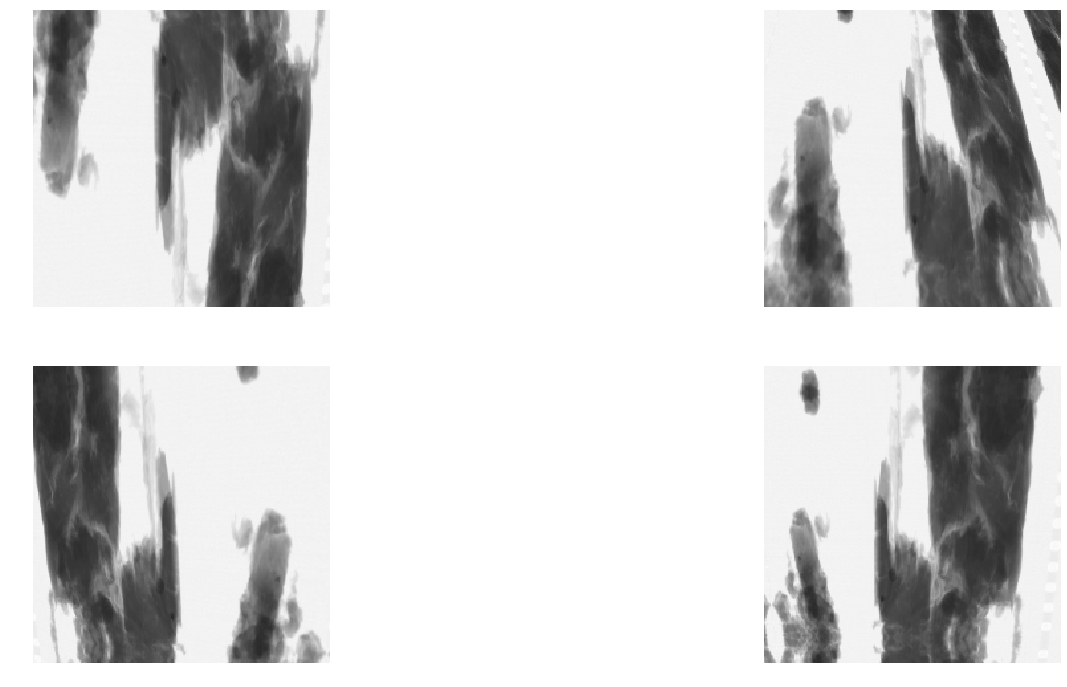

In [7]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=None, max_zoom=1.0, max_lighting=None, max_warp=0.3, p_affine=0.75, p_lighting=0)
print("training data:")
print(tfms[0])
print("\nvalidation data:")
print(tfms[1])

def get_ex(imgPath): return open_image(imgPath)

def plots_f(imgPath, rows, cols, width, height, **kwargs):
    [get_ex(imgPath).apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
plots_f(img_names[1], 2, 2, 24, 12, size=224)

In [7]:
doc(get_transforms)

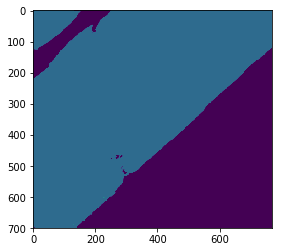

In [217]:
# Function that returns an image from its url
def get_img(img_url):
    return open_image(img_url)

# Function that displays many transformations of an image
def plots_of_one_image(img_url, tfms, rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img(img_url)
    img = img.apply_tfms(tfms, **kwargs)
    plt.figure()
    plt.imshow(img.data[0])
    plt.show()
                               
# for transform in tfms:
plots_of_one_image('/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tif',
                   RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True))
#                    RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-180.0, 180.0)}, p=1.0, resolved={}, do_run=True, is_random=True))

In [21]:
list_to_int = lambda x: x[0] if x.size > 0 else 0

a = np.array([1,1,1,2,2,3,3,3,3,3,4,5,5])
counts, freqs = np.unique(a, return_counts=True)
print(counts, freqs)
print(np.where(counts == 3), list_to_int(freqs[np.where(counts == 10)]))

[1 2 3 4 5] [3 2 5 1 2]
(array([2]),) 0


/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tiff
[0. 1. 3.]
12
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


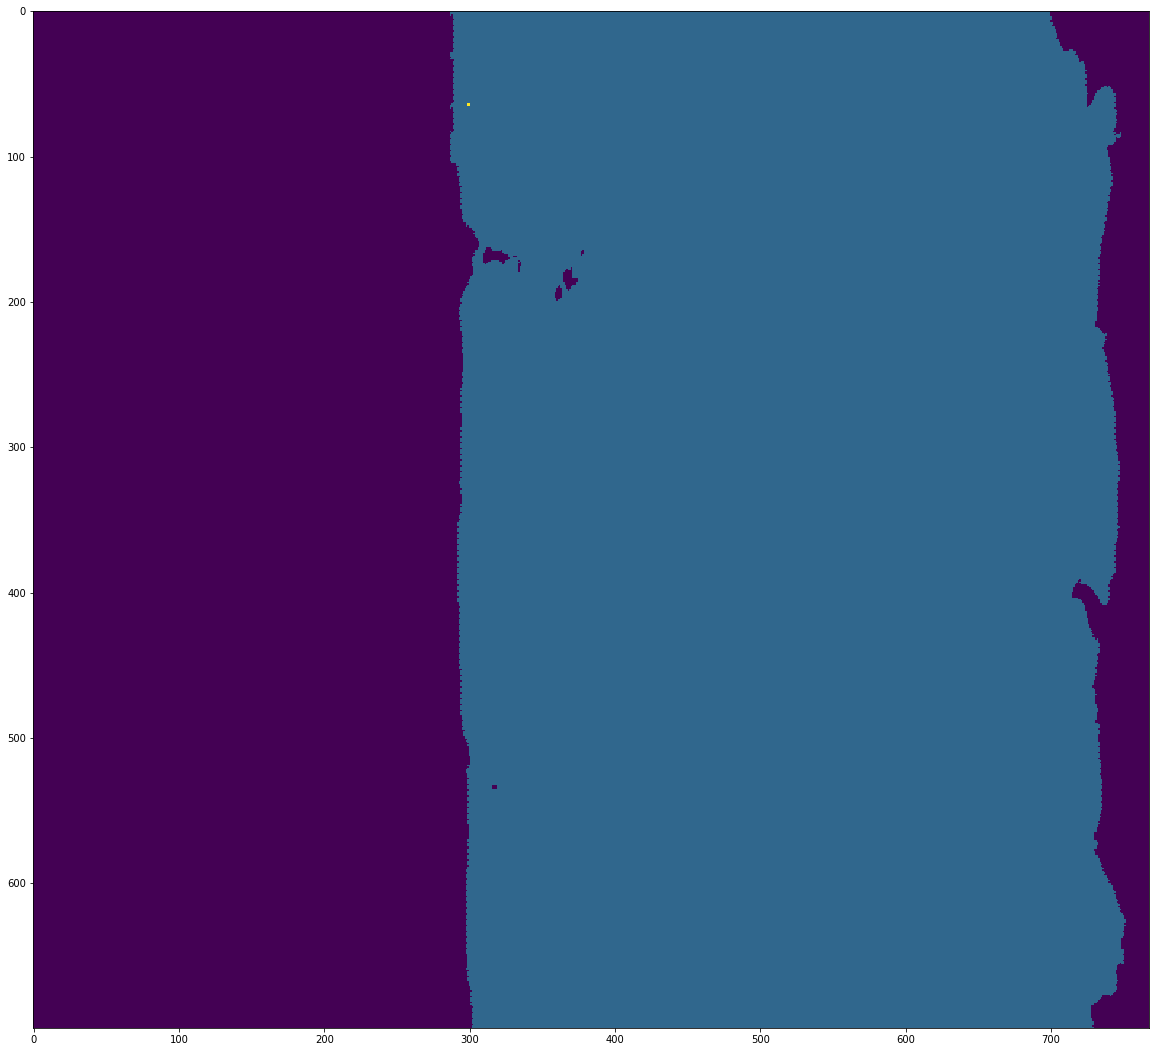

/home/thor/School/Scripts/data/masks/MAGNA_20_78.9422CL_0.960883kg.tiff
[0. 1. 3.]
45
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


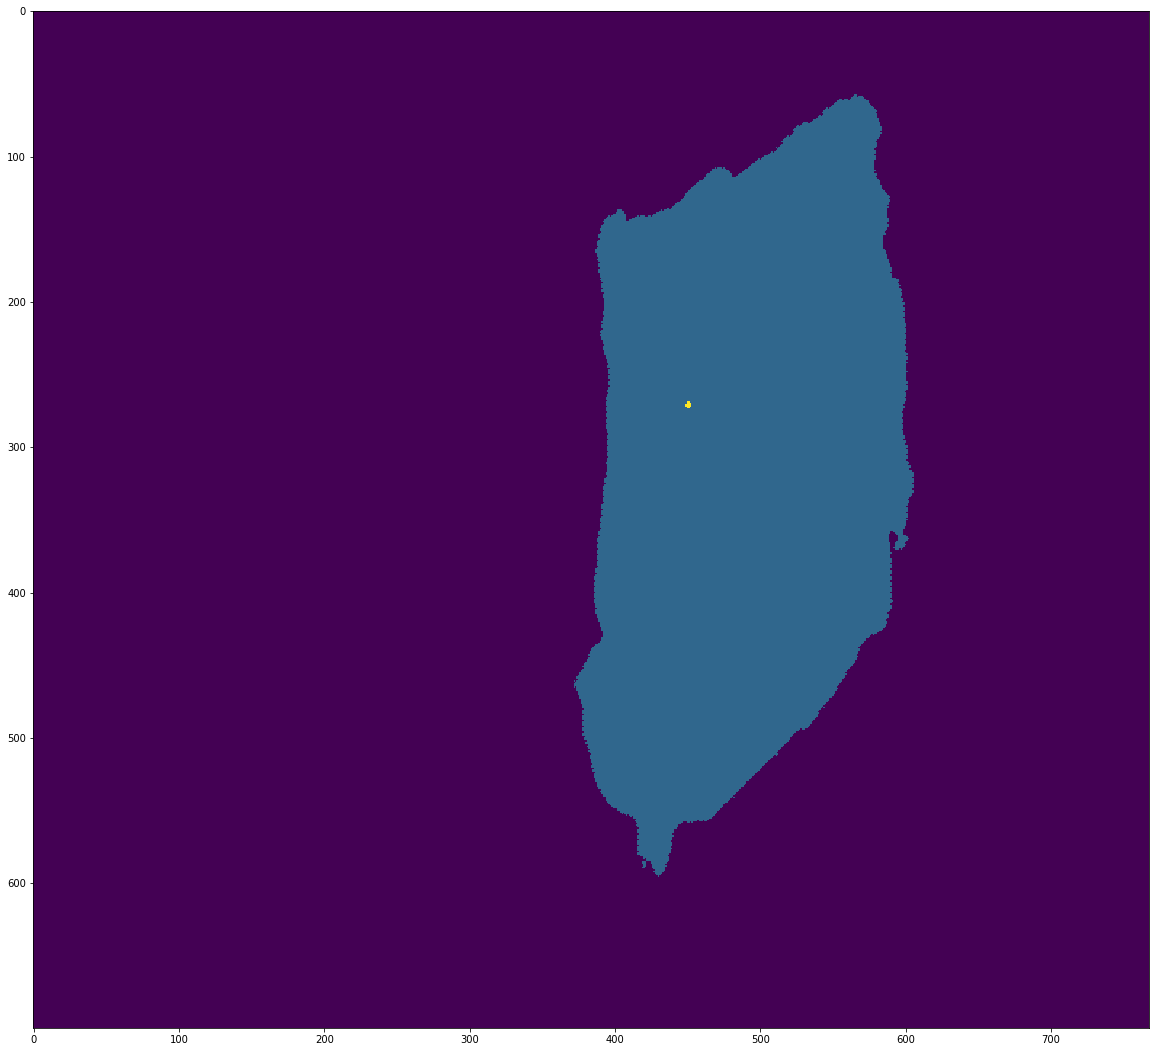

/home/thor/School/Scripts/data/masks/MAGNA_48_-1CL_0.437527kg.tiff
[0. 1. 3.]
24
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


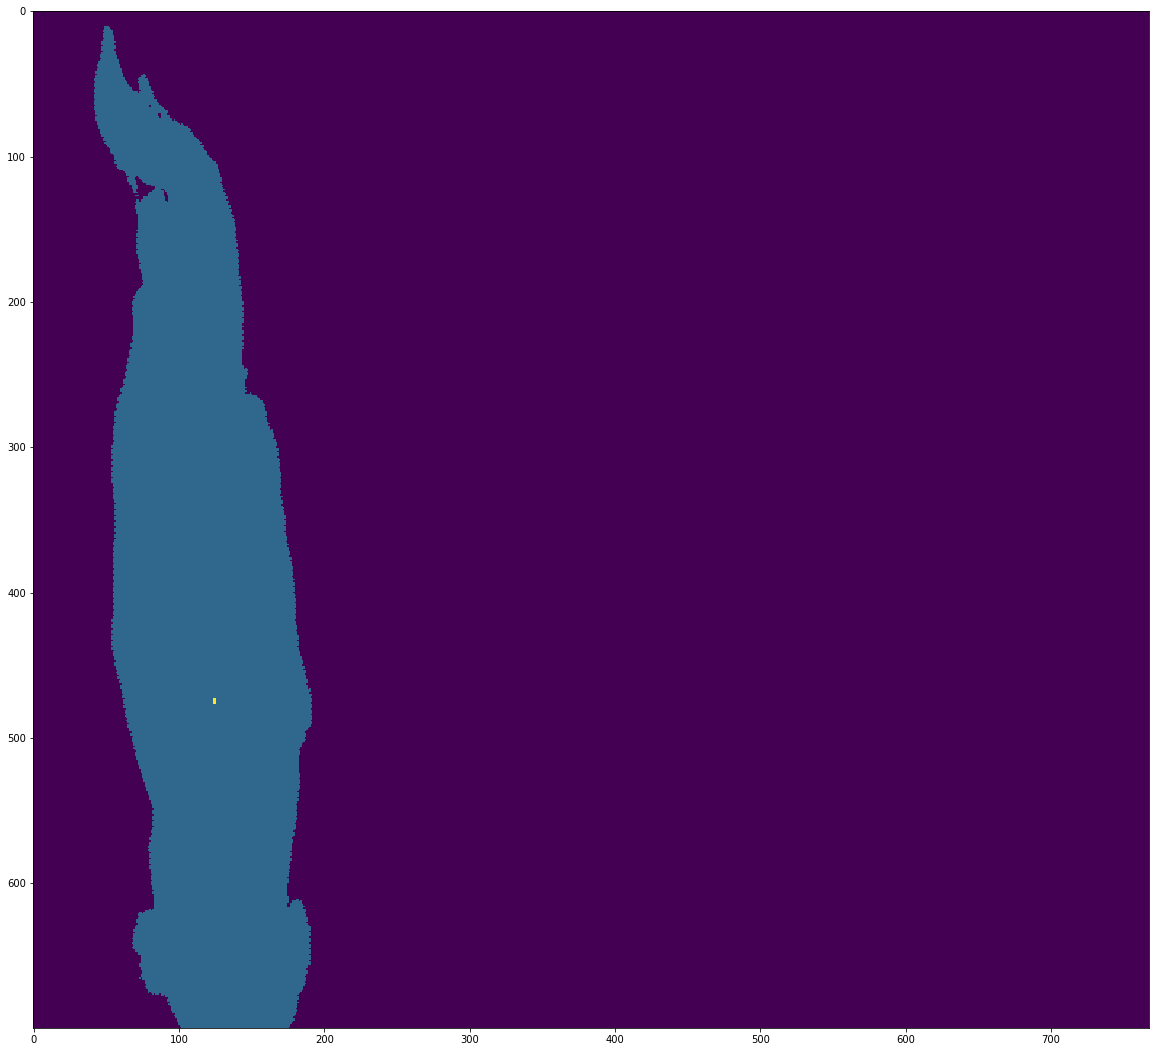

/home/thor/School/Scripts/data/masks/MAGNA_49_-1CL_0.440395kg.tiff
[0. 1. 3.]
18
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


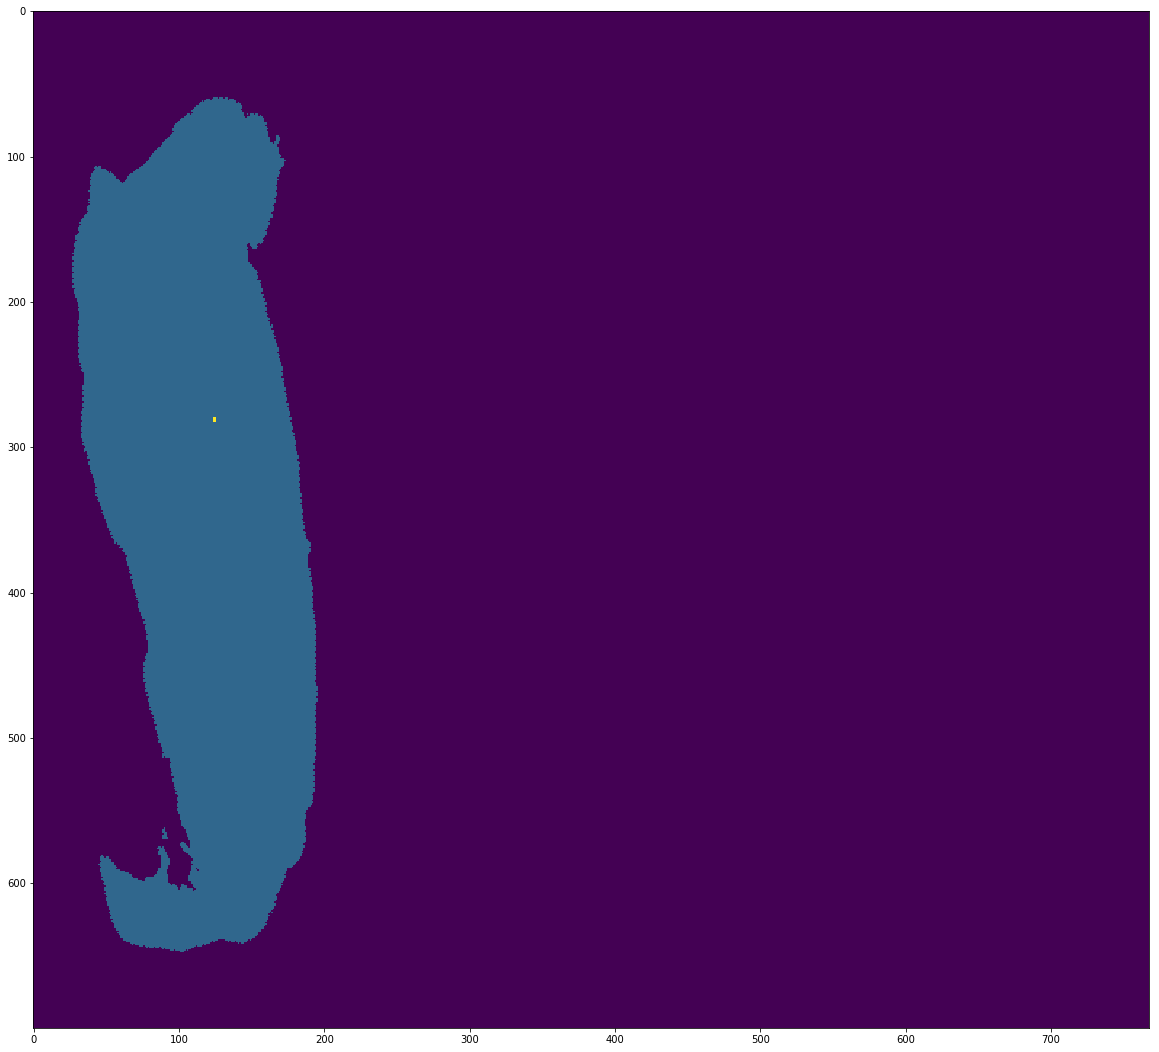

/home/thor/School/Scripts/data/masks/MAGNA_50_-1CL_0.317512kg.tiff
[0. 1. 3.]
24
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


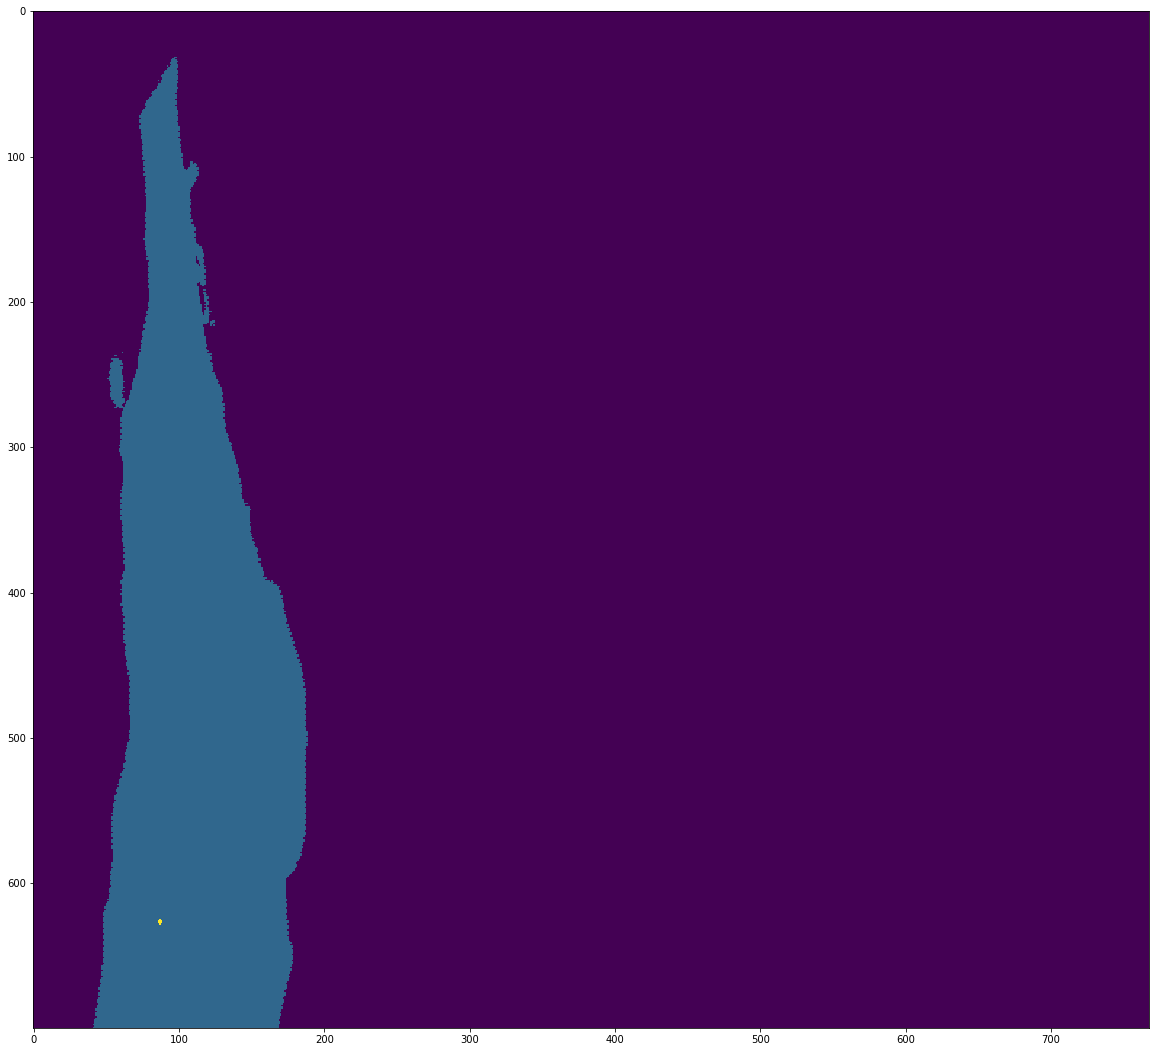

/home/thor/School/Scripts/data/masks/MAGNA_51_-1CL_0.453667kg.tiff
[0. 1. 3.]
24
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


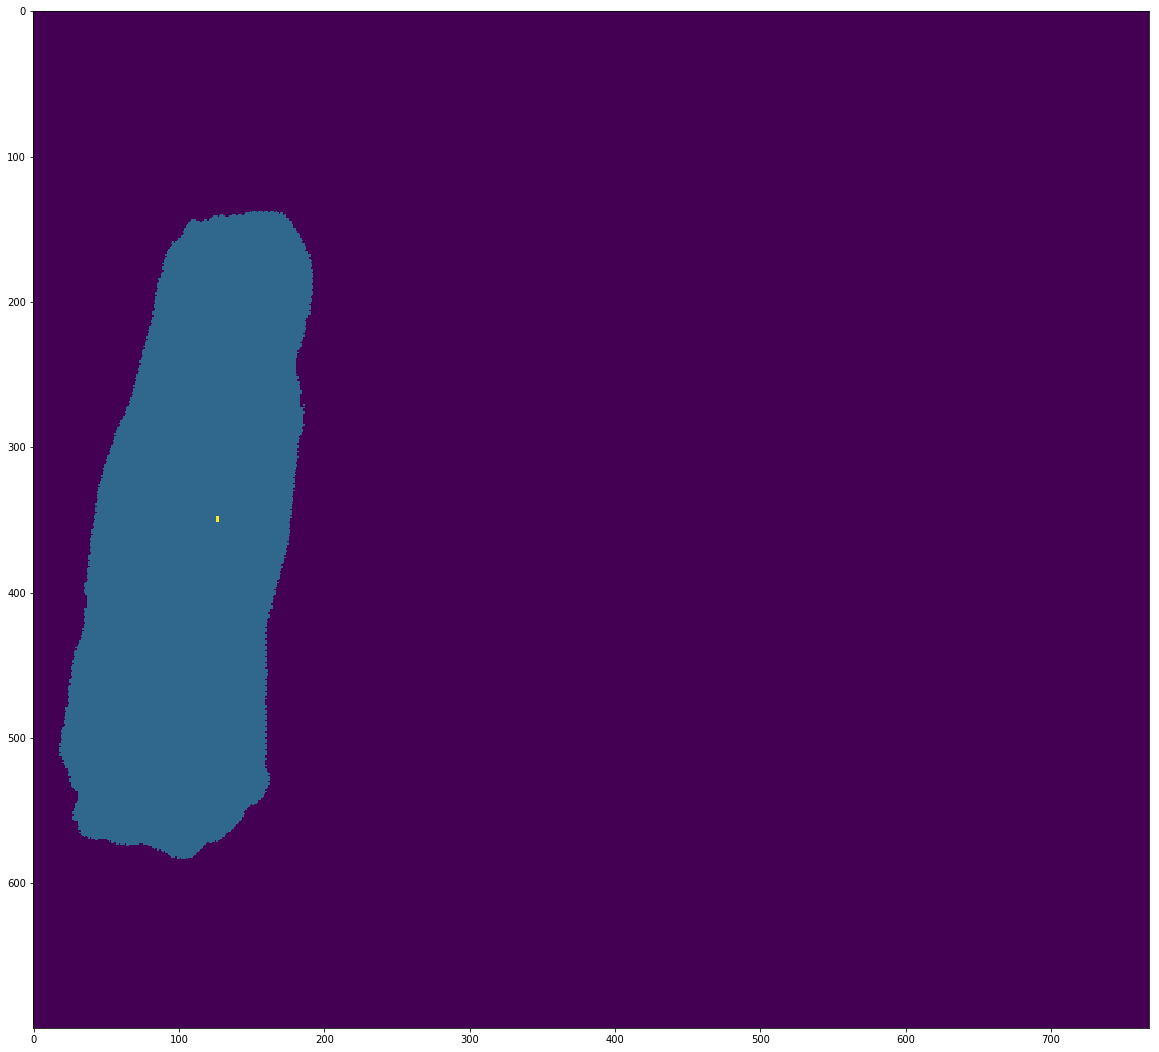

/home/thor/School/Scripts/data/masks/MAGNA_52_-1CL_0.360127kg.tiff
[0. 1. 3.]
24
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


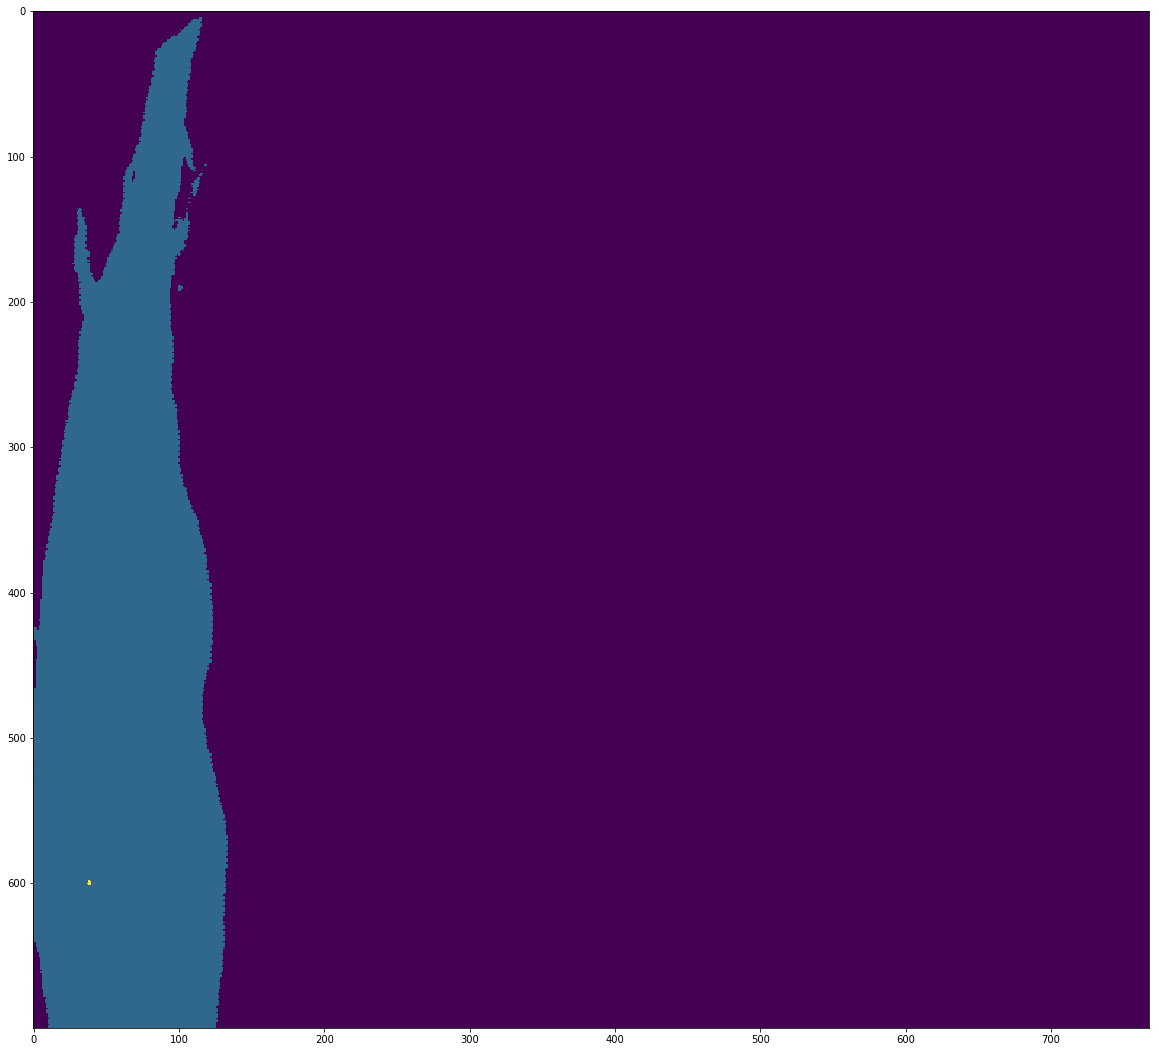

/home/thor/School/Scripts/data/masks/MAGNA_53_-1CL_0.446551kg.tiff
[0. 1. 3.]
60
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


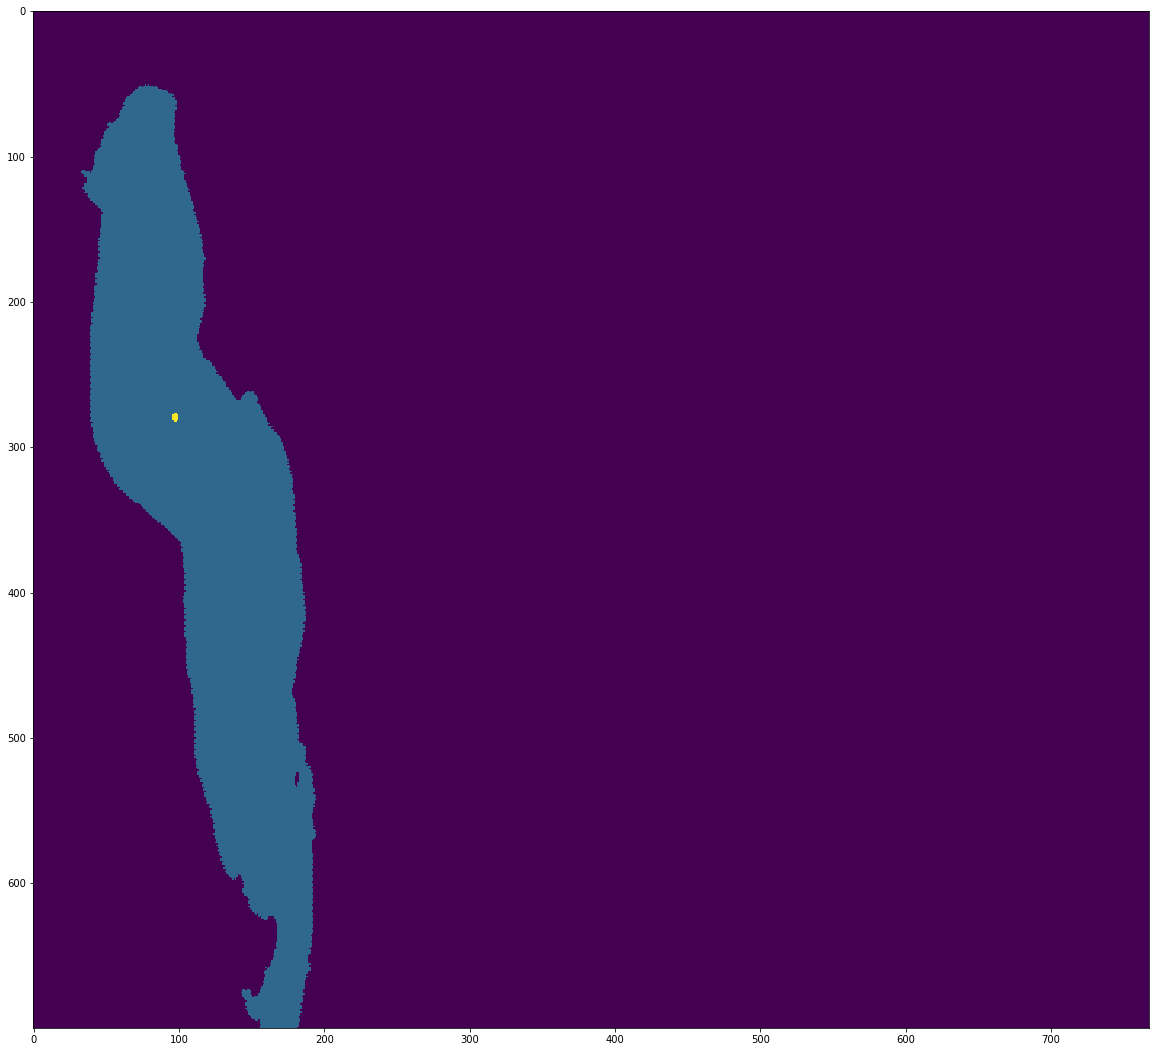

/home/thor/School/Scripts/data/masks/MAGNA_54_-1CL_0.441927kg.tiff
[0. 1. 3.]
15
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


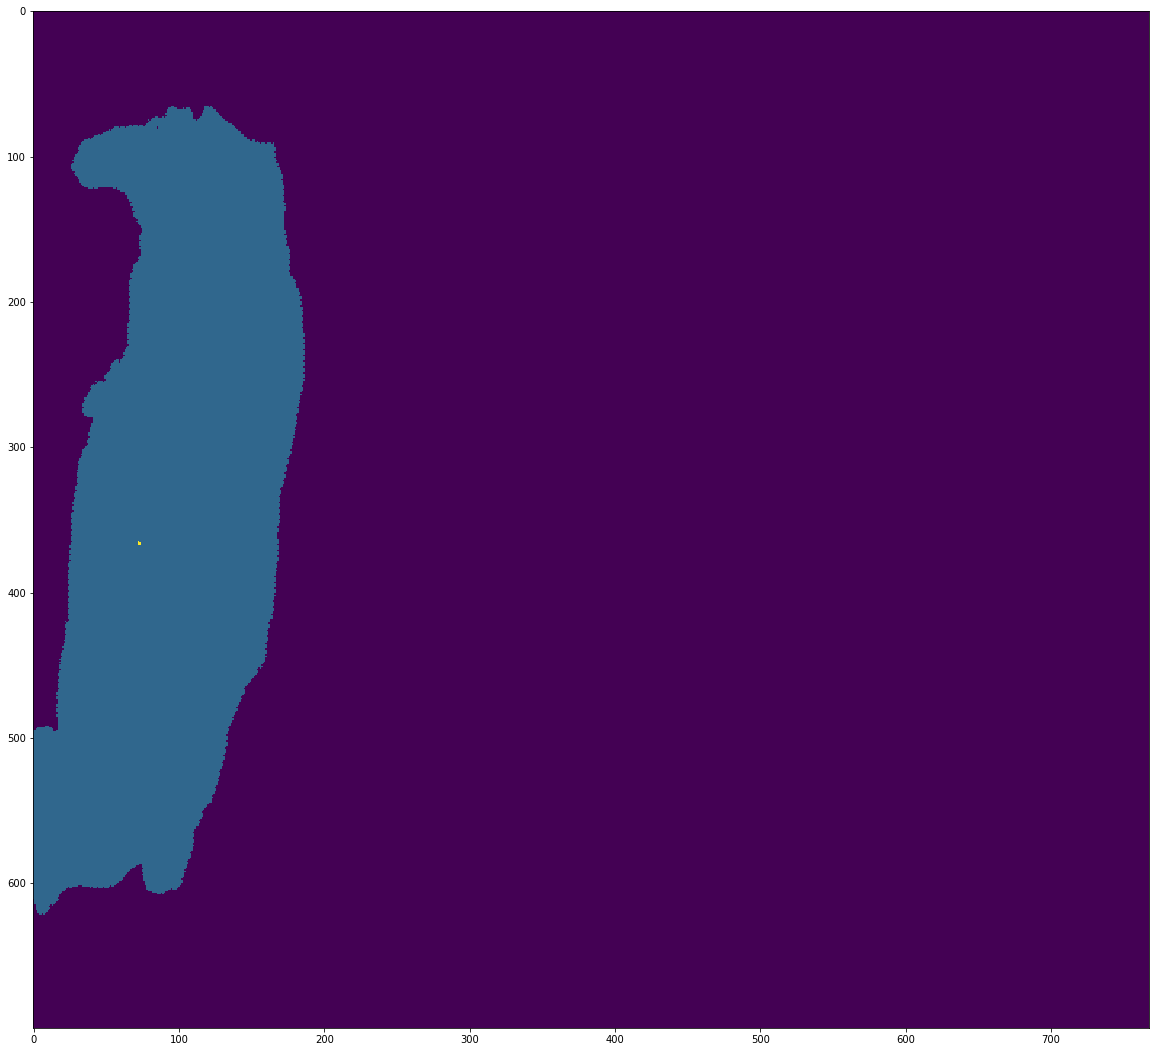

/home/thor/School/Scripts/data/masks/MAGNA_55_-1CL_0.454831kg.tiff
[0. 1. 3.]
75
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3.])
torch.Size([3, 700, 768])


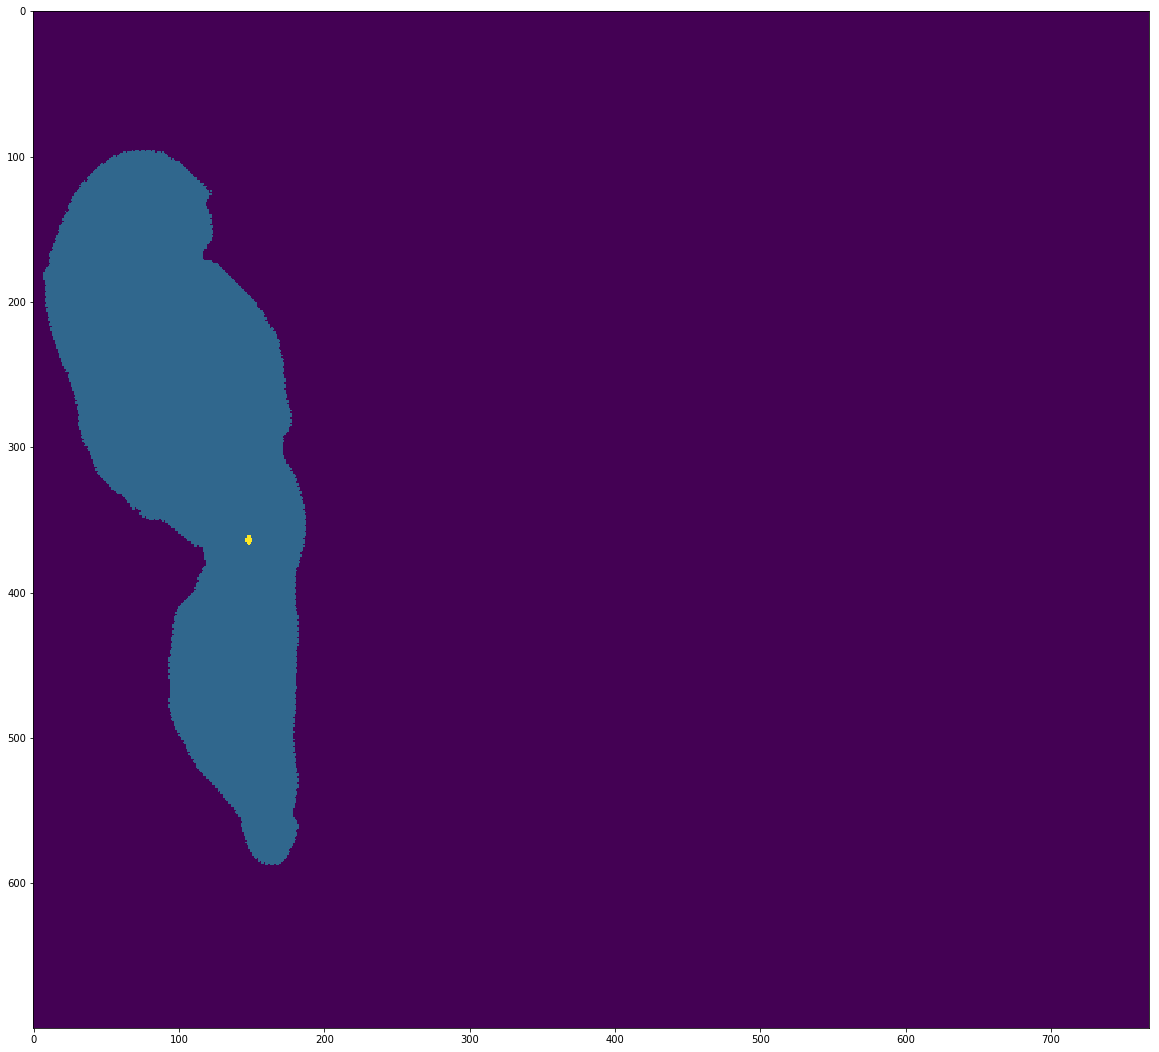

/home/thor/School/Scripts/data/masks/MAGNA_56_-1CL_0.446517kg.tiff
[0. 1. 3.]
33
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


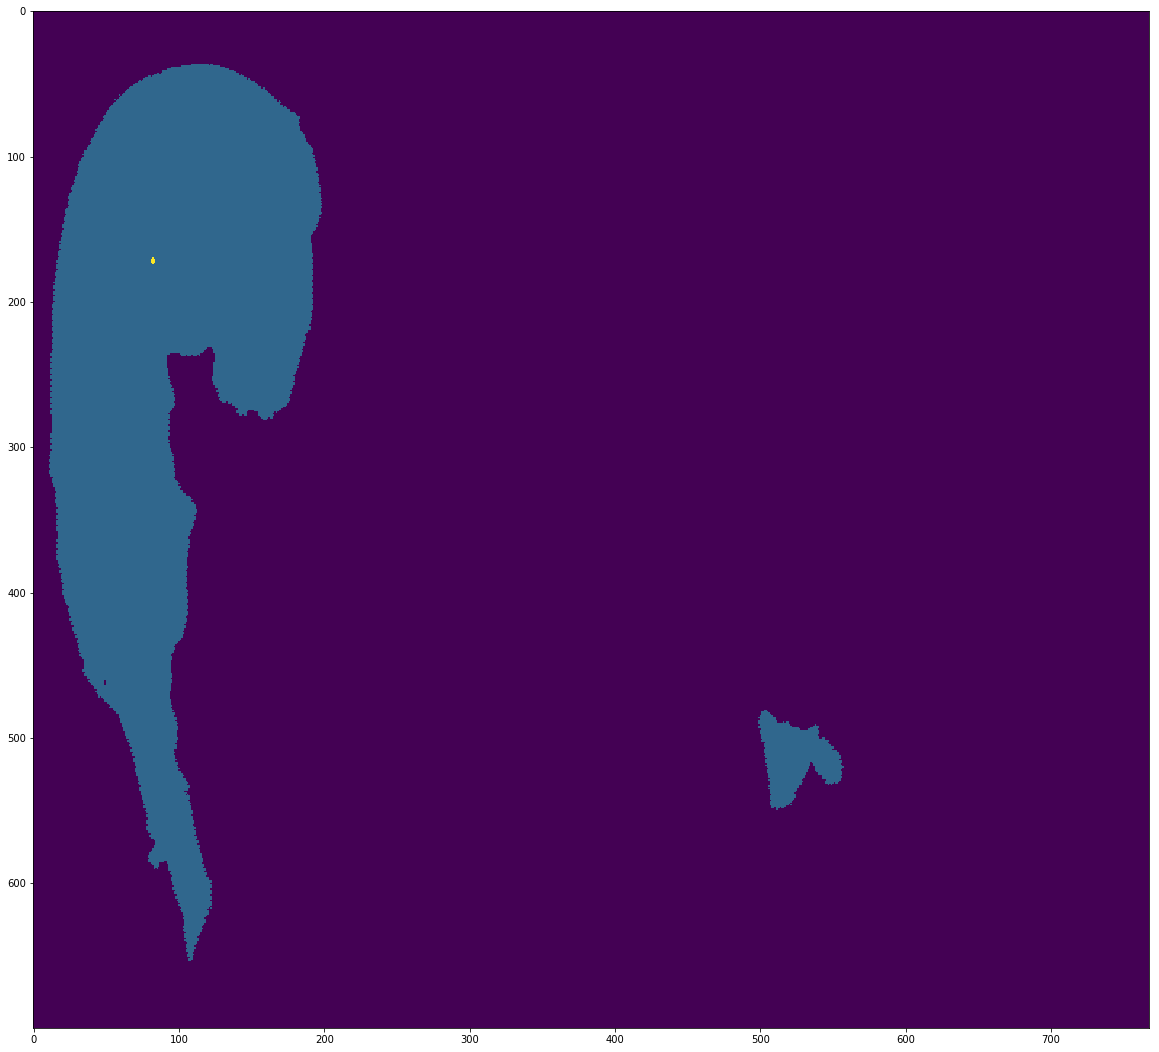

/home/thor/School/Scripts/data/masks/MAGNA_57_-1CL_0.442111kg.tiff
[0. 1. 3.]
21
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3.])
torch.Size([3, 700, 768])


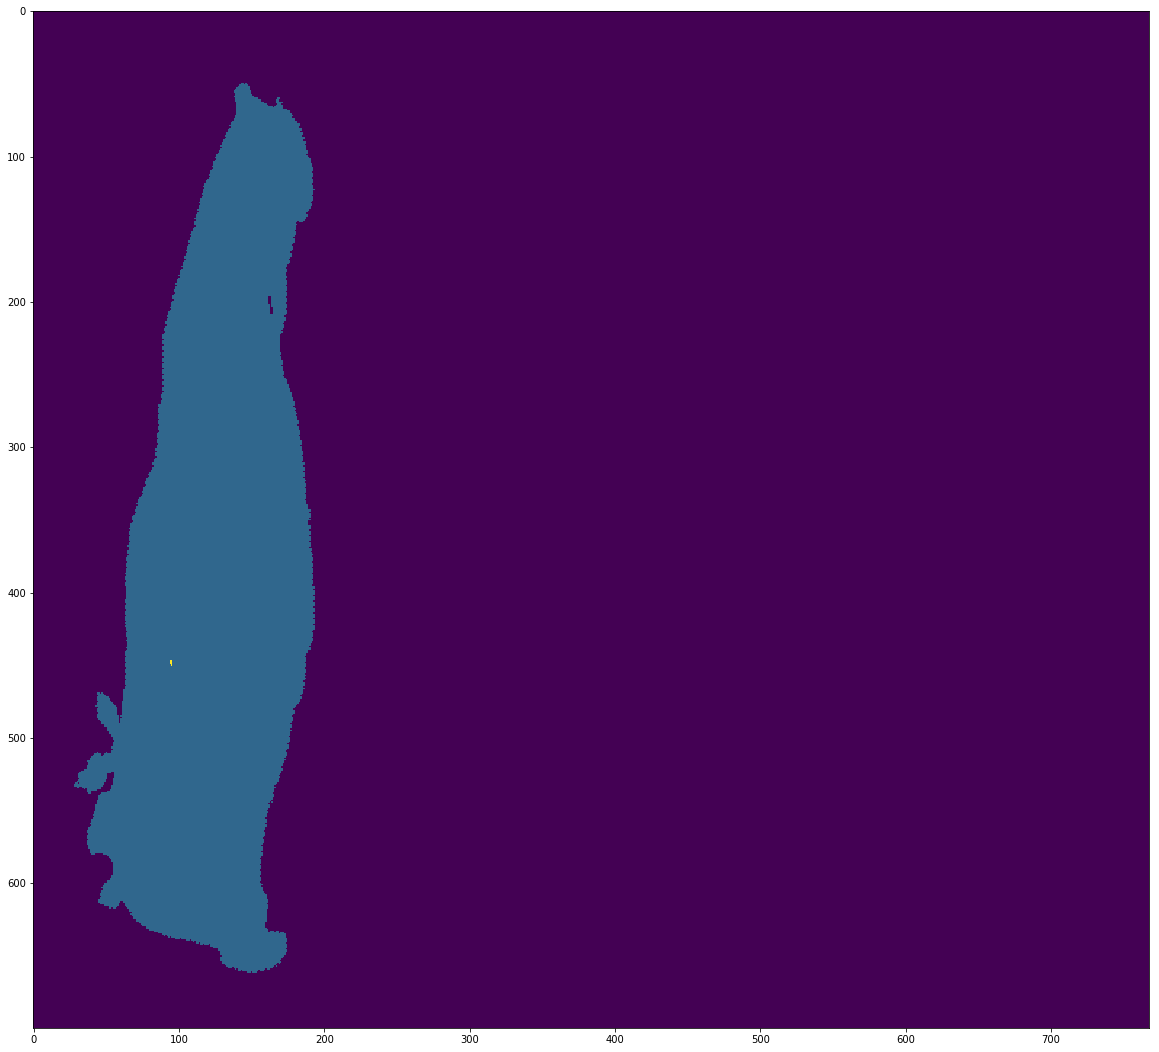

/home/thor/School/Scripts/data/masks/MAGNA_58_-1CL_0.453068kg.tiff
[0. 1. 3.]
60
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


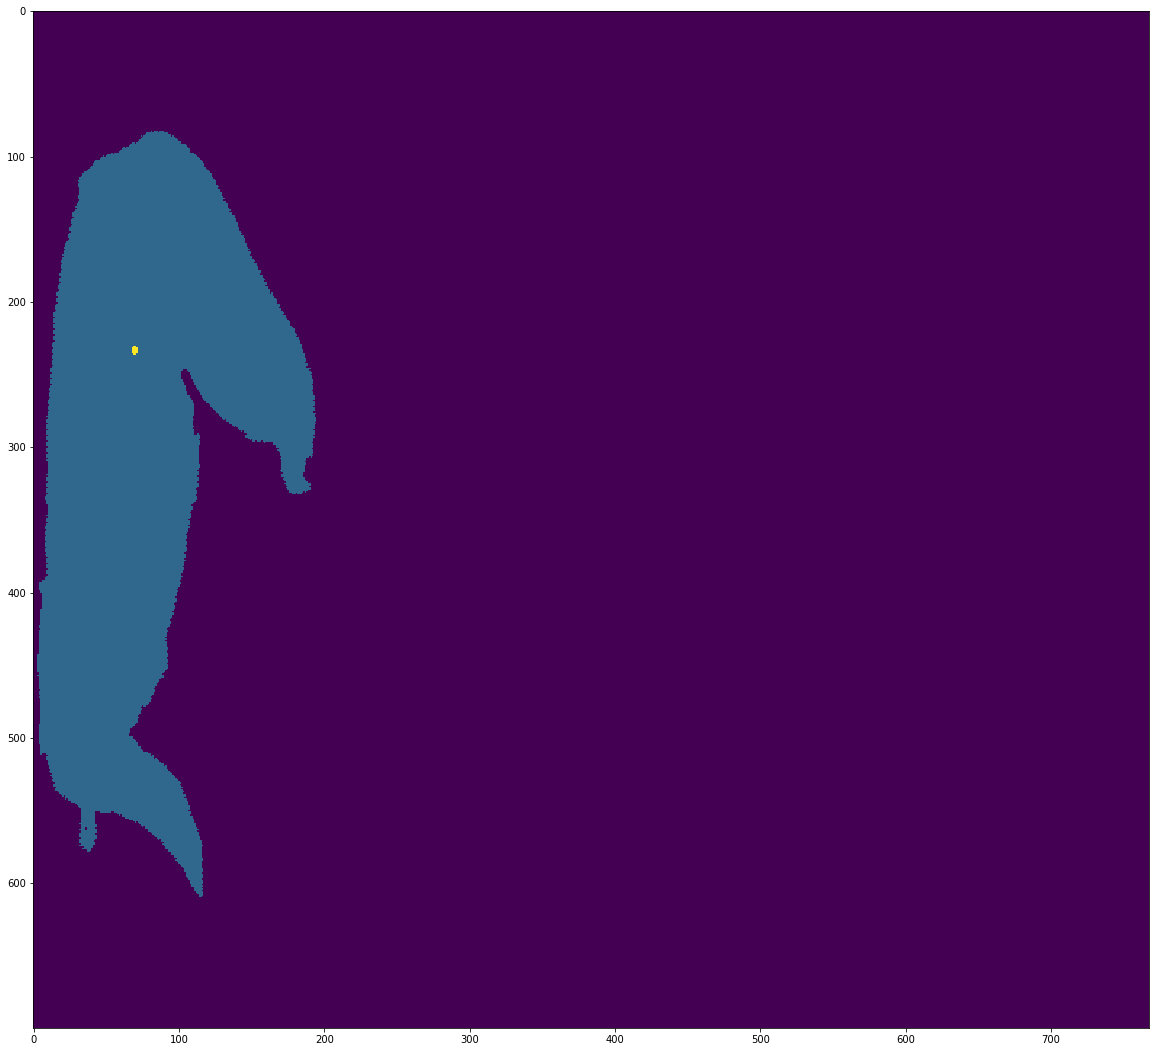

/home/thor/School/Scripts/data/masks/MAGNA_59_-1CL_0.328768kg.tiff
[0. 1. 3.]
30
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


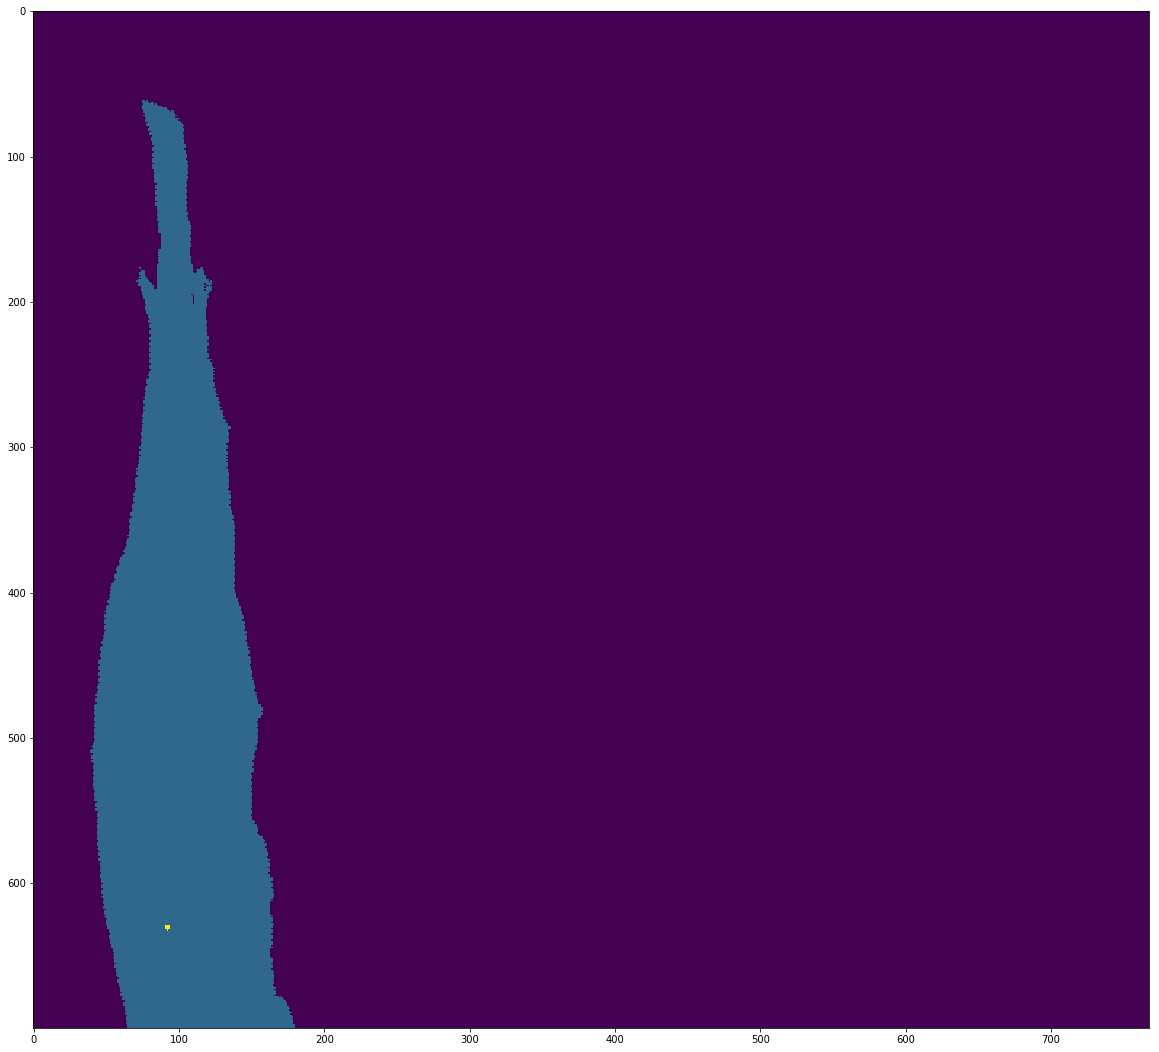

/home/thor/School/Scripts/data/masks/MAGNA_60_-1CL_0.439103kg.tiff
[0. 1. 3.]
18
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


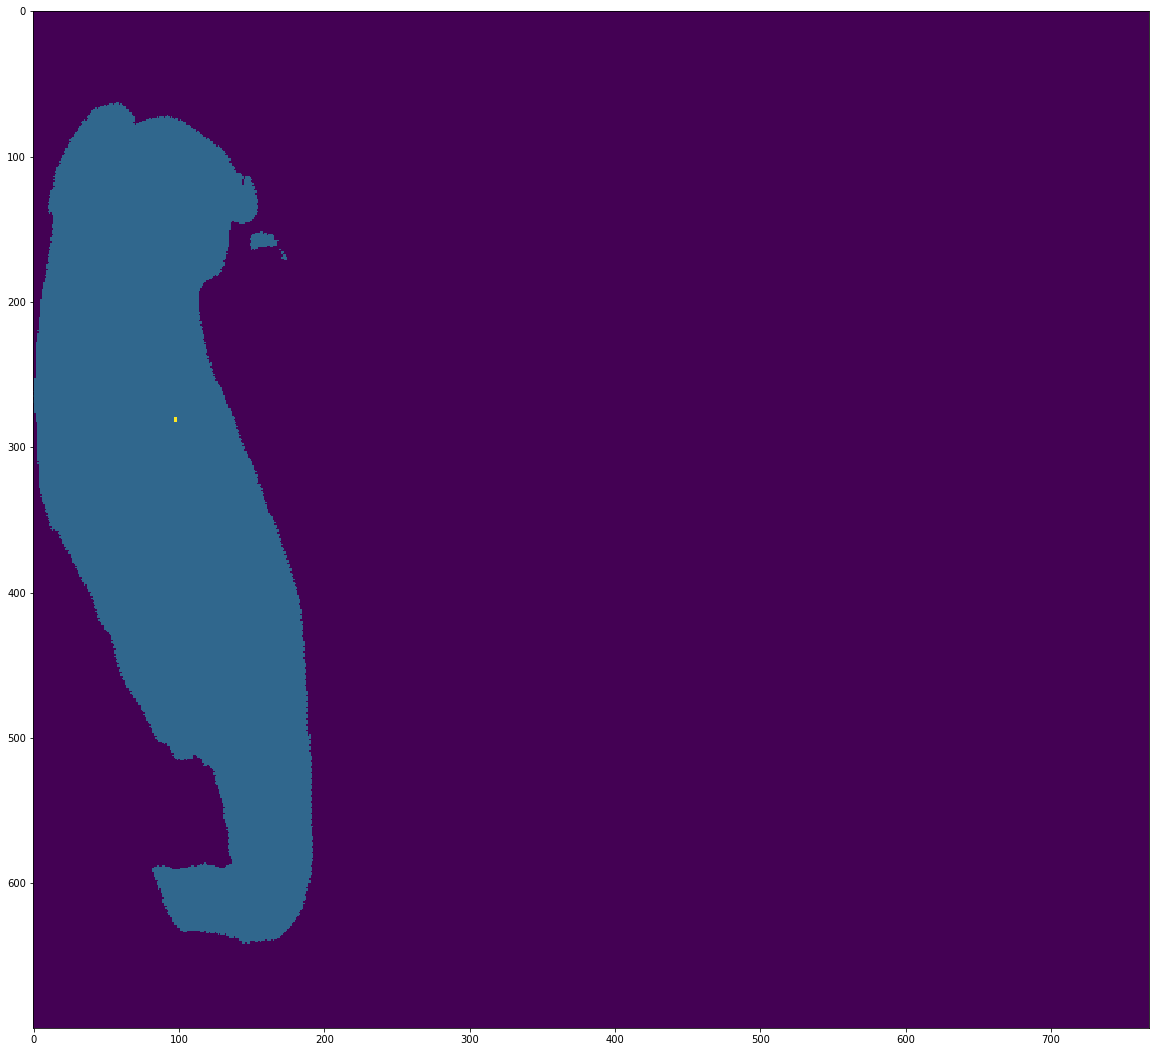

/home/thor/School/Scripts/data/masks/MAGNA_61_83.7706CL_3.88116kg.tiff
[0. 1. 3.]
9
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3.])
torch.Size([3, 700, 768])


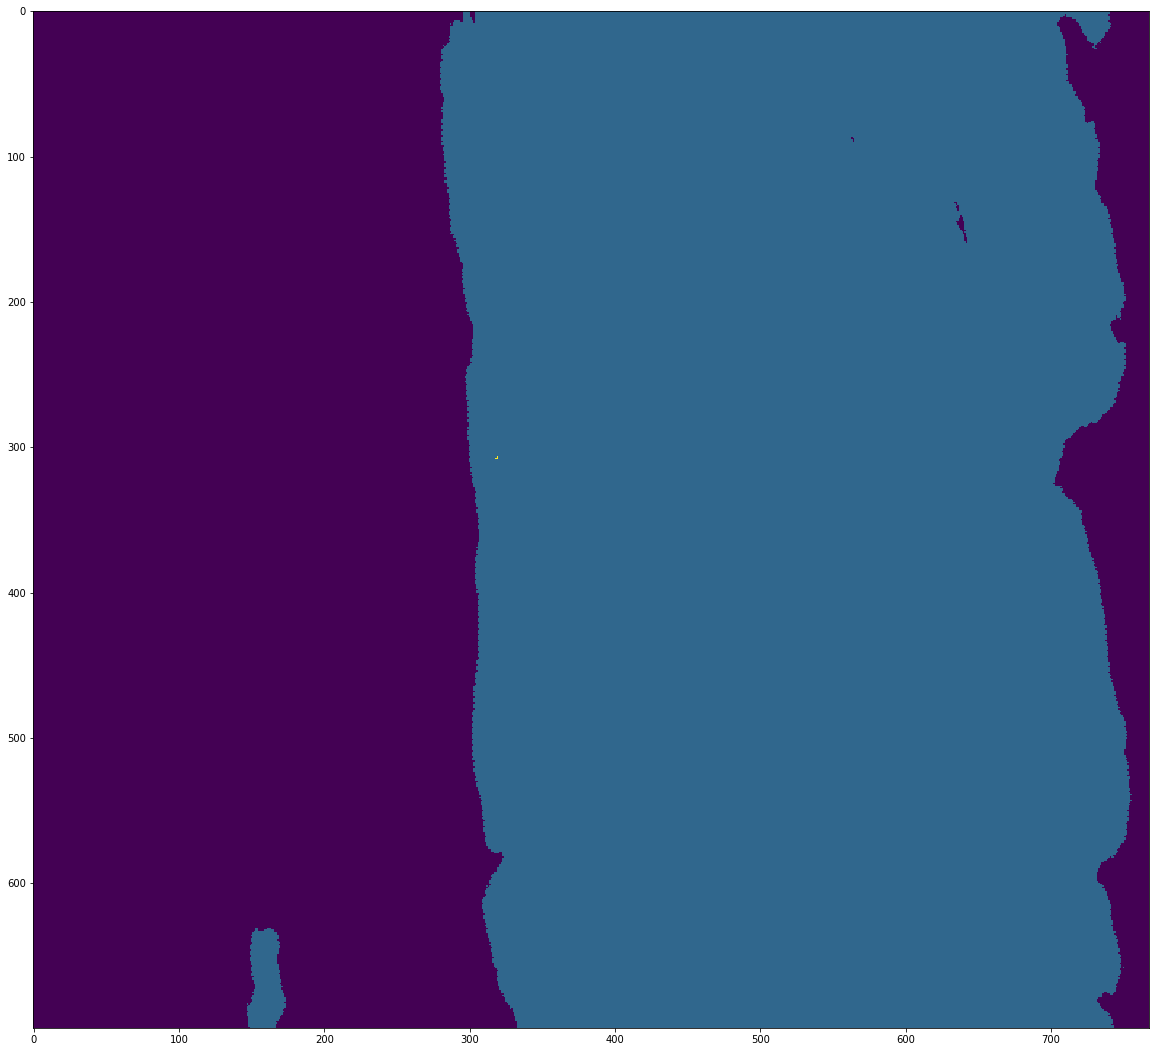

In [5]:
## All metal images:
metal = ['/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tiff',
'/home/thor/School/Scripts/data/masks/MAGNA_20_78.9422CL_0.960883kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_48_-1CL_0.437527kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_49_-1CL_0.440395kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_50_-1CL_0.317512kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_51_-1CL_0.453667kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_52_-1CL_0.360127kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_53_-1CL_0.446551kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_54_-1CL_0.441927kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_55_-1CL_0.454831kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_56_-1CL_0.446517kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_57_-1CL_0.442111kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_58_-1CL_0.453068kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_59_-1CL_0.328768kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_60_-1CL_0.439103kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_61_83.7706CL_3.88116kg.tiff']

for name in metal:
    img = open_image(name, div=False)
    
    if 3 in np.unique(img.data): # Then contains metal
        print(name)
        print(np.unique(img.data))
        print(len(img.data[img.data==3]))
        print(img.data[img.data==3])
        print(img.data.size())
        
        plt.figure(figsize = (20,20))
        plt.imshow(img.data[0])
        plt.show()

        #open_image(name, div=True).show(figsize=(5,5))

In [22]:
# Count all pixels

list_to_int = lambda x: x[0] if x.size > 0 else 0

pixels_metal = 0
pixels_bone  = 0
pixels_meat  = 0
pixels_other = 0
for name in lbl_names:
    img = open_image(name, div=False)
    
    counts, freqs = np.unique(img.data, return_counts=True)
    pixels_metal += list_to_int(freqs[np.where(counts == 3)])
    pixels_bone  += list_to_int(freqs[np.where(counts == 2)])
    pixels_meat  += list_to_int(freqs[np.where(counts == 1)])
    pixels_other += list_to_int(freqs[np.where(counts == 0)])

print("pixels_metal: ", pixels_metal)
print("pixels_bone: ", pixels_bone)
print("pixels_meat: ", pixels_meat)
print("pixels_other: ", pixels_other)


pixels_metal:  492
pixels_bone:  13090584
pixels_meat:  2929532556
pixels_other:  3877907568


In [6]:
pixels_metal = 492
pixels_bone  = 13090584
pixels_meat  = 2929532556
pixels_other = 3877907568
    
total = pixels_metal + pixels_bone + pixels_meat + pixels_other

print("metal: ", pixels_metal / total)
print("bone: ", pixels_bone / total)
print("meat: ", pixels_meat / total)
print("other: ", pixels_other / total)
print()
print("metal: ", exp(-pixels_metal / total))
print("bone: ", exp(-pixels_bone / total))
print("meat: ", exp(-pixels_meat / total))
print("other: ", exp(-pixels_other / total))
print()
print("metal: ", pixels_metal / pixels_metal)
print("bone: ", pixels_metal / pixels_bone)
print("meat: ", pixels_metal / pixels_meat)
print("other: ", pixels_metal / pixels_other)
print()
print("metal: ", exp(pixels_metal / pixels_metal))
print("bone: ", exp(pixels_metal / pixels_bone))
print("meat: ", exp(pixels_metal / pixels_meat))
print("other: ", exp(pixels_metal / pixels_other))


metal:  7.213514396063462e-08
bone:  0.0019192909783918297
meat:  0.42951677370818275
other:  0.5685638631782814

metal:  0.9999999278648587
bone:  0.9980825496827616
meat:  0.6508235137826128
other:  0.5663381940799449

metal:  1.0
bone:  3.7584266675955784e-05
meat:  1.6794488219369016e-07
other:  1.268725443741675e-07

metal:  2.718281828459045
bone:  1.0000375849729735
meat:  1.0000001679448962
other:  1.0000001268725525


In [39]:
# open_image(name, div=True).show(figsize=(5,5))
# plt.figure(figsize = (20,20))
# plt.imshow(img.data[0])
# plt.show()

In [23]:
from skimage.measure import regionprops, label

count = 0
for idx, name in enumerate(lbl_names):
    img = open_image(name, div=False, convert_mode=None)
    
    data = img.data[0].numpy().astype(int)
            
#     pixel_count = len(data[data == 2])
#     if pixel_count > 400:
#         print(name)
#         print("Has {} contaminant pixels".format(pixel_count))
        
    data[data == 1] = 0
#     data[data == 2] = 0  # Set the bones as background

    labels = label(data, background=0) # same image_binary as above
    regions = regionprops(labels)
    contaminant_count = len(regions)
    if contaminant_count > 3:
        print(name)
        print("Found {} metal groups".format(contaminant_count))

        plt.figure(figsize = (15,15))
        plt.imshow(img.data[0])
        plt.show()
        
        

labels [[0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 ...
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]]
labels[] [1 1 1 1 ... 3 3 3 3]
regions [<skimage.measure._regionprops._RegionProperties object at 0x7efc62640c18>, <skimage.measure._regionprops._RegionProperties object at 0x7efc62a95cf8>, <skimage.measure._regionprops._RegionProperties object at 0x7efc62a95ef0>]
2 474 343
2 560 316
2 619 168
0


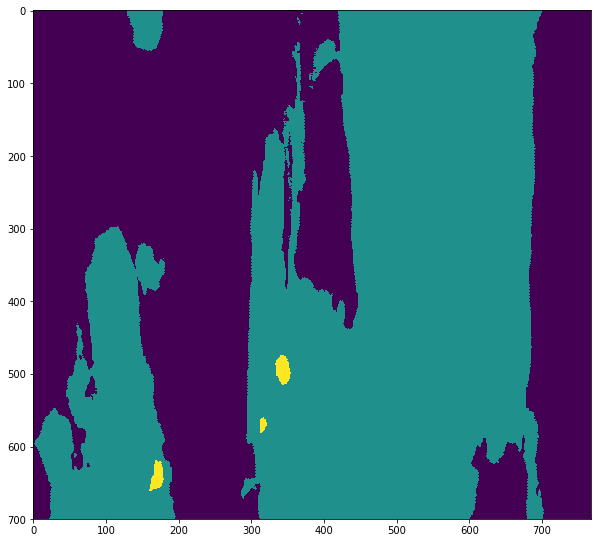

In [44]:
from skimage.measure import regionprops, label

count = 0
for idx, name in enumerate([lbl_names[1]]):
    img = open_image(name, div=False, convert_mode=None)
    
    data = img.data[0].numpy().astype(int)
            
#     pixel_count = len(data[data == 2])
#     if pixel_count > 400:
#         print(name)
#         print("Has {} contaminant pixels".format(pixel_count))
        
    data[data == 1] = 0
#     data[data == 2] = 0  # Set the bones as background

    labels = label(data, background=0) # same image_binary as above
    regions = regionprops(labels)
    print("labels", labels)
    print("labels[]", labels[labels != 0])
    print("regions", regions)
    unfound_contaminants = len(regions)
    for reg in regions:
        for x, y in reg.coords:
            a = data[x, y]
            print(a, x, y)
            if a != 0 and a != 1:
                unfound_contaminants -= 1
                break
        
    print(unfound_contaminants)
    plt.figure(figsize = (10,10))
    plt.imshow(img.data[0])
    plt.show()

In [34]:
regions, regions[0].coords, [[print(j) for j in i] for i in regions[0].coords]

474
343
474
344
475
340
475
341
475
342
475
343
475
344
475
345
476
340
476
341
476
342
476
343
476
344
476
345
476
346
476
347
477
339
477
340
477
341
477
342
477
343
477
344
477
345
477
346
477
347
478
338
478
339
478
340
478
341
478
342
478
343
478
344
478
345
478
346
478
347
479
337
479
338
479
339
479
340
479
341
479
342
479
343
479
344
479
345
479
346
479
347
479
348
480
336
480
337
480
338
480
339
480
340
480
341
480
342
480
343
480
344
480
345
480
346
480
347
480
348
480
349
480
350
481
335
481
336
481
337
481
338
481
339
481
340
481
341
481
342
481
343
481
344
481
345
481
346
481
347
481
348
481
349
481
350
482
335
482
336
482
337
482
338
482
339
482
340
482
341
482
342
482
343
482
344
482
345
482
346
482
347
482
348
482
349
483
335
483
336
483
337
483
338
483
339
483
340
483
341
483
342
483
343
483
344
483
345
483
346
483
347
483
348
483
349
483
350
484
334
484
335
484
336
484
337
484
338
484
339
484
340
484
341
484
342
484
343
484
344
484
345
484
346
484
347
484
348
484
349


([<skimage.measure._regionprops._RegionProperties at 0x7efcd528f2e8>,
 array([[474, 343],
        [474, 344],
        [475, 340],
        [475, 341],
        ...,
        [514, 347],
        [515, 343],
        [515, 344],
        [515, 345]]),
 [[None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [None, None],
  [

In [35]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a, a[[1, 1]], [1, 1]

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]), array([[4, 5, 6],
        [4, 5, 6]]), [1, 1])

In [22]:
# No contaminant found in these image

print("No contaminant found in these images")
count = 0
for idx, name in enumerate(lbl_names):
    img = open_image(name, div=False)
    
    values = np.unique(img.data)
    if ((3 not in values) and (2 not in values)):
        print(name)
        count += 1
        

No contaminant found in these images
/home/thor/School/Scripts/data/masks/MAGNA_82_73.429CL_4.57361kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_60_81.3607CL_3.91723kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_24_62.691CL_5.62494kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_32_83.5199CL_3.1396kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_86_78.183CL_3.3554kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_48_79.0586CL_2.77403kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_12_-1CL_2.80497kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_22_83.1881CL_3.17582kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_73_78.822CL_3.71024kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_21_-1CL_0.901515kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_16_81.8749CL_3.41197kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_2_80.2382CL_3.37124kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_46_95.1205CL_1.10004kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_21_70.9793CL_

/home/thor/School/Scripts/data/masks/MAGNA_32_82.2589CL_3.30396kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_75_-1CL_0.00603545kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_1_68.5561CL_3.5819kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_41_-1CL_9.99998e-06kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_92_78.0684CL_3.20538kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_56_76.0499CL_3.18102kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_5_85.4797CL_3.41677kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_67_79.9232CL_2.91653kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_22_82.7743CL_3.45761kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_59_-1CL_0.147816kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_33_72.1865CL_3.28548kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_79_-1CL_0kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_73_-1CL_0.0486509kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_34_74.1451CL_3.3945kg.tiff
/home/thor/School/Scripts/data/

/home/thor/School/Scripts/data/masks/MAGNA_2_80.4027CL_3.51178kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_12_74.5377CL_3.50103kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_99_86.2618CL_3.49147kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_3_79.6144CL_3.34081kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_68_78.1764CL_4.12357kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_7_-1CL_0.0319293kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_3_79.841CL_3.80364kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_29_80.7447CL_3.92842kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_99_79.4247CL_3.20061kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_45_75.1671CL_3.47745kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_56_78.8413CL_6.21299kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_62_-1CL_0.52689kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_23_83.9424CL_3.34123kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_22_-1CL_0.0351258kg.tiff
/home/thor/School/Scri

/home/thor/School/Scripts/data/masks/MAGNA_23_80.975CL_3.58305kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_84_82.7007CL_3.42278kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_8_82.839CL_3.66776kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_78_-1CL_0.467819kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_45_76.9965CL_3.03041kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_50_79.8328CL_3.31195kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_98_-1CL_0.00926783kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_9_74.9768CL_3.44603kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_33_74.9812CL_3.9988kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_61_72.6006CL_7.00485kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_72_-1CL_0.0502995kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_4_87.0527CL_3.52707kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_85_79.9192CL_4.14518kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_73_81.8303CL_3.28519kg.tiff
/home/thor/School/Scr

In [4]:
x = torch.ones(1)  # create a tensor with requires_grad=False (default)
print(x.requires_grad)

y = torch.ones(1)  # another tensor with requires_grad=False
z = x + y
# both inputs have requires_grad=False. so does the output
print(z.requires_grad)

# then autograd won't track this computation. let's verify!
# z.backward()
# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

# now create a tensor with requires_grad=True
w = torch.ones(1, requires_grad=True)
print(w.requires_grad)

# add to the previous result that has require_grad=False
total = w + z
# the total sum now requires grad!
print(total.requires_grad)

# autograd can compute the gradients as well
total.backward()
print(w.grad)

# and no computation is wasted to compute gradients for x, y and z, which don't require grad
print(z.grad == x.grad == y.grad == None)

False
False
True
True
tensor([1.])
True
